In [1]:
include("../src/guillot.jl")
import .guillot

using Plots
using Printf

In [2]:
Tint = 230.0
Tsta = 4000.0
Rsta = 6.95508e8
dist = 0.0172 * 1.495979e11
grav = 9.2

Tirr = guillot.eval_Tirr(Tsta, Rsta, dist)
Teqm = guillot.eval_Teqm(Tsta, Rsta, dist)

1470.513738682038

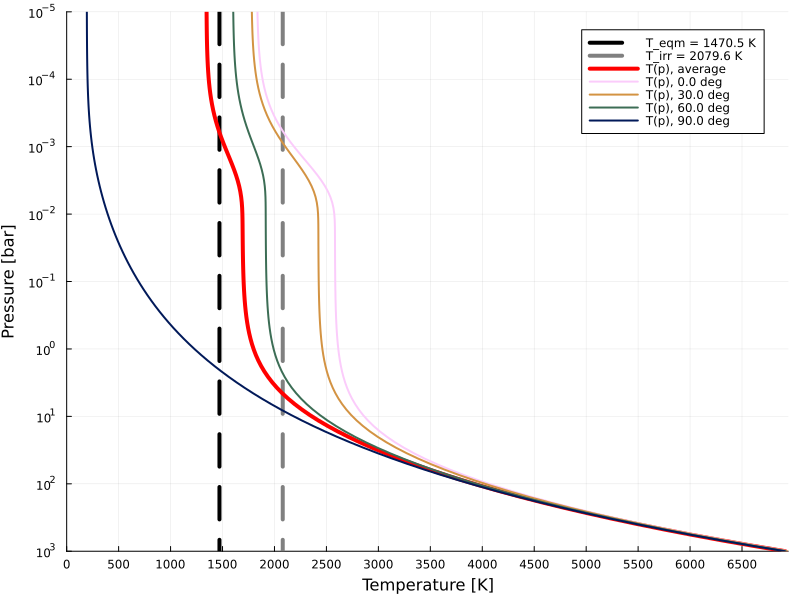

In [3]:
fig = plot(legend=:topright, size=(800,600),
            yscale=:log10, yflip=true, ylabel="Pressure [bar]",
            xlabel="Temperature [K]", xlim=(0, Inf), xticks=range(0, 9000, step=500))

p_arr = 10.0 .^ range(0, 8, 100)
ylims  = (p_arr[1]/1e5, p_arr[end]/1e5)
yticks = 10.0 .^ round.(Int,range( log10(ylims[1]), stop=log10(ylims[2]), step=1))
yaxis!(yticks=yticks, ylims=ylims)

lw = 2

vline!(fig, [Teqm], ls=:dash, color=:black, lw=2*lw, label=@sprintf("T_eqm = %.1f K", Teqm))
vline!(fig, [Tirr], ls=:dash, color=:grey,  lw=2*lw, label=@sprintf("T_irr = %.1f K", Tirr))

plot!(fig, guillot.calc_profile_avg(p_arr, grav, Tint, Teqm), p_arr./1e5, label="T(p), average", color=:red, lw=2*lw)

nsamp = 4
p = reverse(Plots.palette(:batlow, nsamp))
for (i,t) in enumerate(range(0.0, 90.0, length=nsamp))
    theta = t
    c = p[i]
    plot!(fig, guillot.calc_profile_cos(p_arr, grav, Tint, Tirr, theta), p_arr./1e5,
                label=@sprintf("T(p), %.1f deg",t), lw=lw, color=c)
end
display(fig)